In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize


In [4]:
education_df = pd.read_csv('states_all.csv')
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [8]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] ==
                                                                                    state, fill_list].interpolate()
    
education_df.dropna(inplace=True)

In [9]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.000000,466.000000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.444830e+05,1.081519e+07,9.580231e+05,5.011699e+06,4.845469e+06,1.089849e+07,5.650708e+06,3.188074e+06,4.922479e+05,...,72531.345494,72920.954936,64806.416309,5.837301e+05,2.867842e+05,8.935117e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122384e+06,1.358235e+07,1.331475e+06,6.411774e+06,6.338172e+06,1.375873e+07,7.262925e+06,3.840561e+06,6.014541e+05,...,86460.436575,85834.653148,77546.862443,6.925375e+05,3.407958e+05,1.060033e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.774370e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.635558e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.750000,20880.250000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.659445e+05,6.139972e+06,5.601350e+05,3.034960e+06,2.467272e+06,6.317938e+06,3.193509e+06,1.908255e+06,3.304065e+05,...,50918.000000,50114.500000,41790.000000,4.083570e+05,1.871180e+05,6.282085e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.040284e+06,6.260627e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.666548e+05,...,79929.500000,80949.750000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


1. It appears that support services take up over a quarter of the total expenditures although students that need support do not comprise a quarter of the school.

The average number of students drop from 8th grade to 12th grade.

2. In 2008 there was an economic downturn and the graph shows a reduction in revenue.

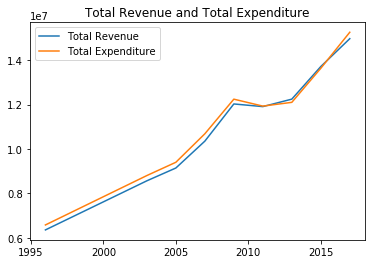

In [10]:
plt.plot(education_df.loc[education_df.STATE == "WASHINGTON", "YEAR"],
        education_df.loc[education_df.STATE == "WASHINGTON", "TOTAL_REVENUE"], label="Total Revenue")

plt.plot(education_df.loc[education_df.STATE == "WASHINGTON", "YEAR"],
        education_df.loc[education_df.STATE == "WASHINGTON", "TOTAL_EXPENDITURE"], label="Total Expenditure")

plt.title("Total Revenue and Total Expenditure")
plt.legend()
plt.show()

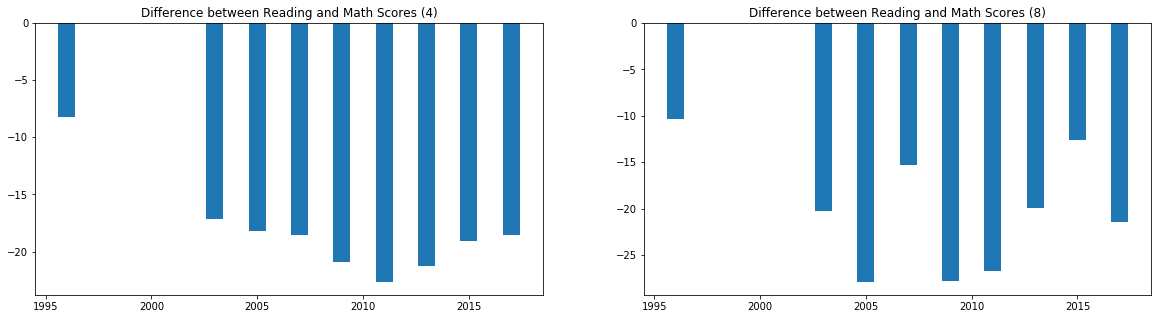

In [11]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(education_df.loc[education_df.STATE == "WASHINGTON", "YEAR"],
       education_df.loc[education_df.STATE == "WASHINGTON", "AVG_READING_4_SCORE"] 
        - education_df.loc[education_df.STATE == "WASHINGTON", "AVG_MATH_4_SCORE"])

plt.title("Difference between Reading and Math Scores (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == "WASHINGTON", "YEAR"],
       education_df.loc[education_df.STATE == "WASHINGTON", "AVG_READING_8_SCORE"] 
        - education_df.loc[education_df.STATE == "WASHINGTON", "AVG_MATH_8_SCORE"])

plt.title("Difference between Reading and Math Scores (8)")

plt.show()



In [12]:
print("Difference between Reading and Math Scores (4)")
print(education_df.loc[education_df.STATE == "WASHINGTON", "AVG_READING_4_SCORE"] 
        - education_df.loc[education_df.STATE == "WASHINGTON", "AVG_MATH_4_SCORE"])
print("Difference between Reading and Math Scores (8)")
print(education_df.loc[education_df.STATE == "WASHINGTON", "AVG_READING_8_SCORE"] 
        - education_df.loc[education_df.STATE == "WASHINGTON", "AVG_MATH_8_SCORE"])

Difference between Reading and Math Scores (4)
251     -8.206331
608    -17.196144
710    -18.198277
812    -18.542895
918    -20.926981
1021   -22.654097
1123   -21.239475
1225   -19.088533
1488   -18.577592
dtype: float64
Difference between Reading and Math Scores (8)
251    -10.310012
608    -20.271792
710    -27.883125
812    -15.266041
918    -27.775699
1021   -26.679371
1123   -19.915063
1225   -12.551276
1488   -21.386479
dtype: float64


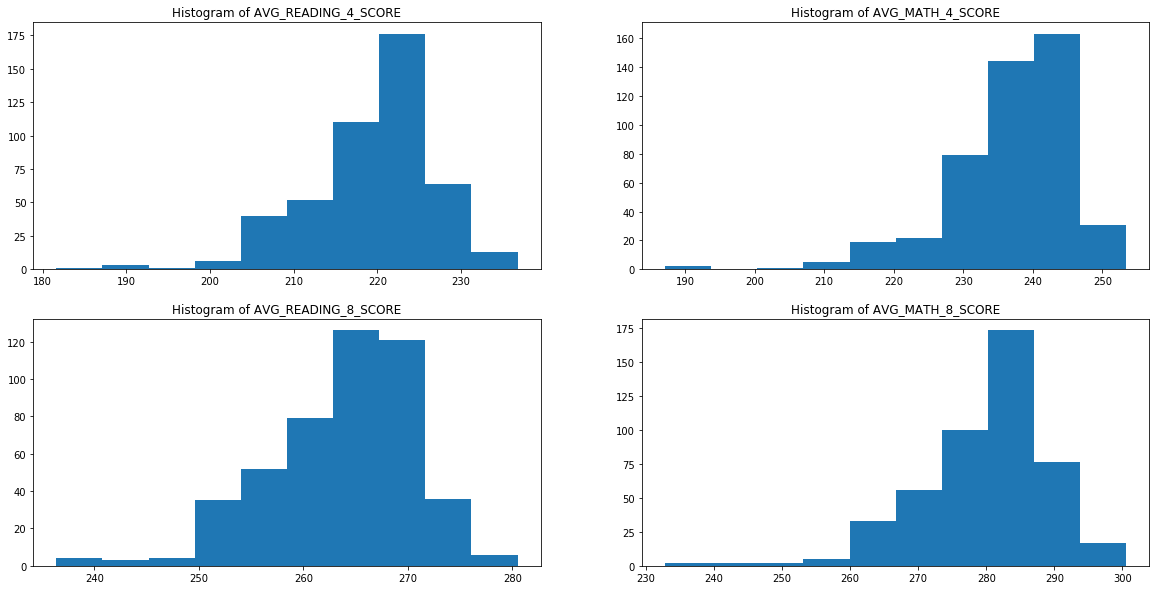

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

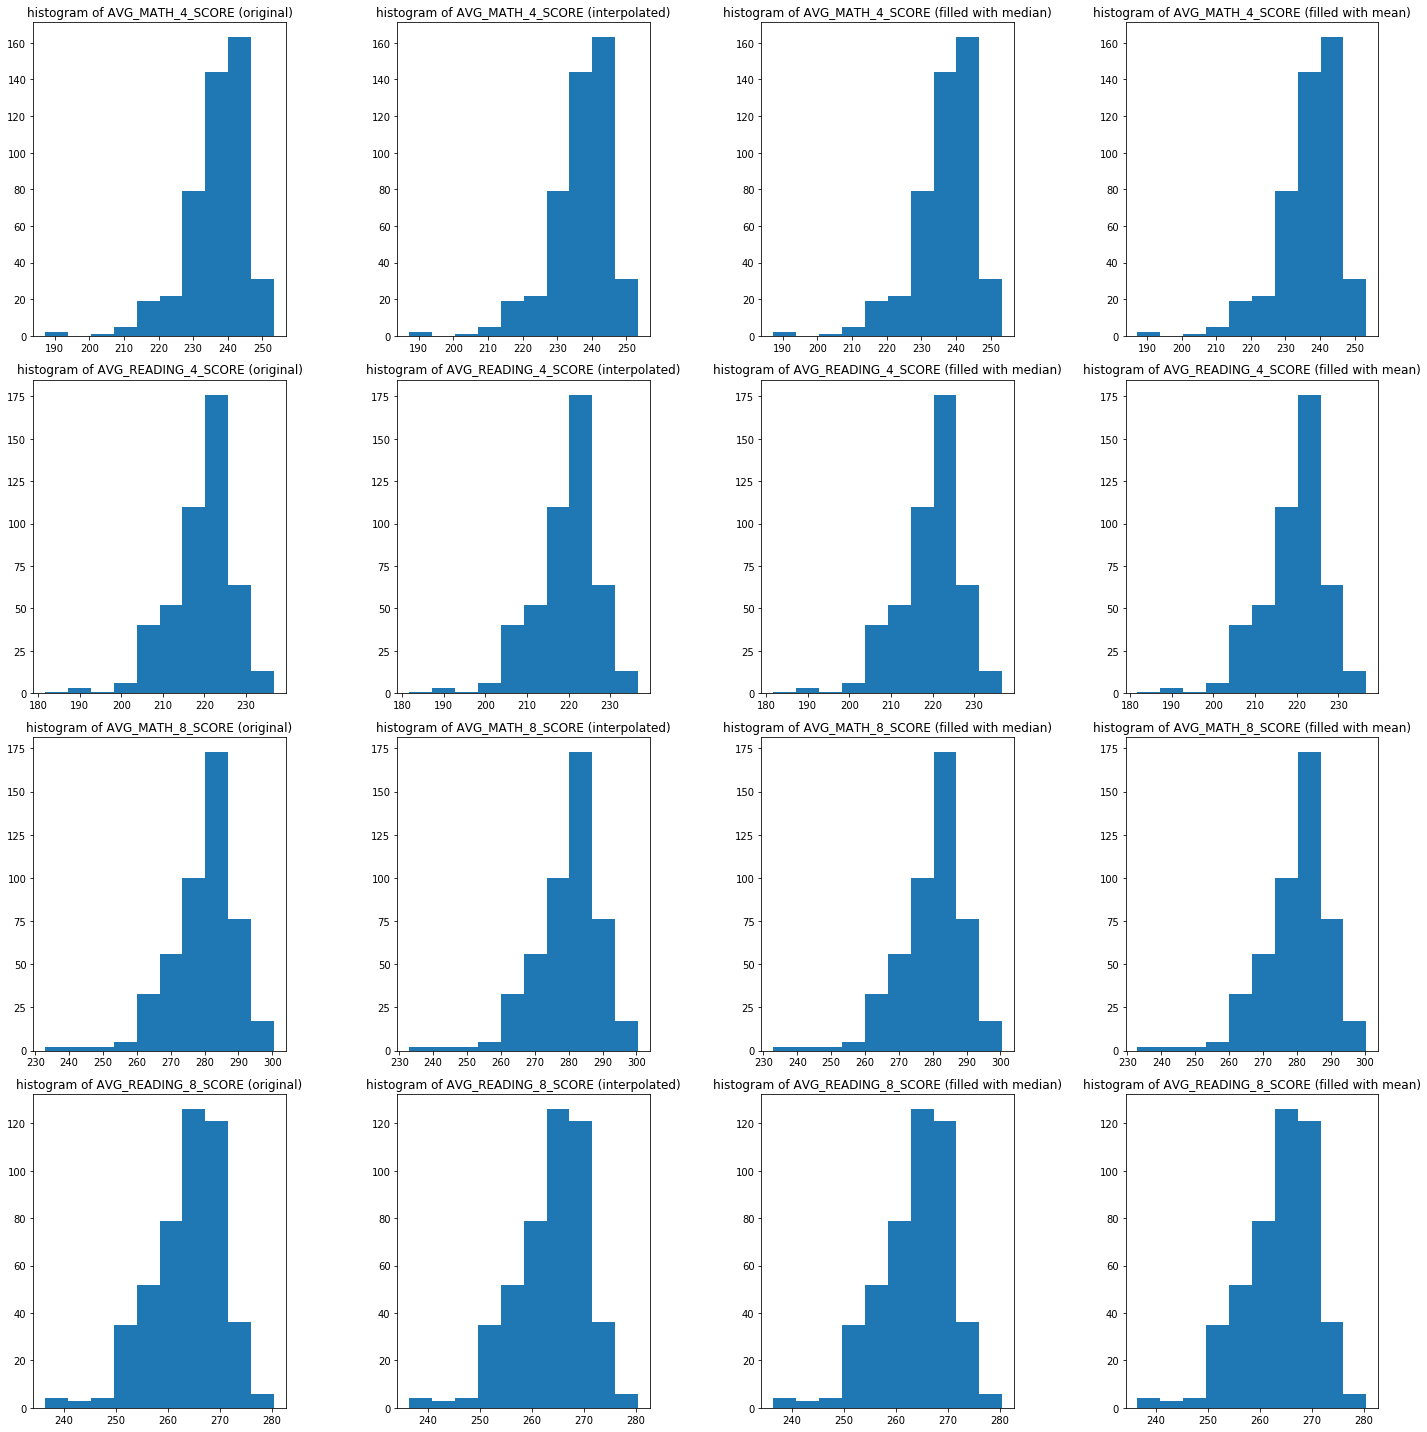

In [20]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()